In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import os 
import arrow

from matplotlib import pylab as plt
import seaborn as sns

from IPython.display import display
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 300)

## Datasets:
- IMDB spoiler dataset __json__
- Reddit data: posts, comments __csv__ ohter info: author, date, tect
- Movies info data (OMDB API __csv__)

### IMDB spoiler dataset

In [2]:
datapath = '../data'
fpath = lambda s: os.path.join(datapath, s)

data = []
detail = []
for r in open(fpath('IMDB_reviews.json'), 'r'):
    data.append(json.loads(r))
for r in open(fpath('IMDB_movie_details.json'), 'r'):
    detail.append(json.loads(r))
data = pd.DataFrame(data)
detail = pd.DataFrame(detail)

In [3]:
print(detail.shape)
display(detail.head())
detail.to_csv(fpath('movies_details.csv'), index=False)

(1572, 7)


,duration,genre,movie_id,plot_summary,plot_synopsis,rating,release_date
0,1h 57min,"[Action, Thriller]",tt0105112,"Former CIA analyst, Jack Ryan is in England with his family on vacation when he suddenly witnesses an explosion outside Buckingham Palace. It is revealed that some people are trying to abduct a member of the Royal Family but Jack intervenes, killing one of them and capturing the other, and stops...","Jack Ryan (Ford) is on a ""working vacation"" in London with his family. He has retired from the CIA and is a Professor at the US Naval Academy. He is seen delivering a lecture at the Royal Naval Academy in London.Meanwhile, Ryan's wife Cathy and daughter Sally are sightseeing near Buckingham Pala...",6.9,1992-06-05
1,1h 45min,[Comedy],tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro), Archie (Morgan Freeman) and Sam (Kevin Kline) have been best friends since childhood. So when Billy, the group's sworn bachelor, finally proposes to his thirty-something (of course) girlfriend, the four head to Las Vegas with a plan to stop acting...","Four boys around the age of 10 are friends in Brooklyn during the '50s. They have a nickname, the Flatbush Four, and also pal around with a girl. One day they get into a scuffle at a store with a young thug, and steal a bottle of scotch as they run away.58 years later: Sam has retired with his w...",6.6,2013-11-01
2,1h 37min,"[Comedy, Romance]",tt0243655,"The setting is Camp Firewood, the year 1981. It's the last day before everyone goes back to the real world, but there's still a summer's worth of unfinished business to resolve. At the center of the action is camp director Beth, who struggles to keep order while she falls in love with the local ...",,6.7,2002-04-11
3,2h 6min,"[Adventure, Drama, Western]",tt0040897,"Fred C. Dobbs and Bob Curtin, both down on their luck in Tampico, Mexico in 1925, meet up with a grizzled prospector named Howard and decide to join with him in search of gold in the wilds of central Mexico. Through enormous difficulties, they eventually succeed in finding gold, but bandits, the...","Fred Dobbs (Humphrey Bogart) and Bob Curtin (Tim Holt) are down on their luck in Mexico and are both victims of a swindle in which workers are hired but not paid by a notoriously corrupt local businessman (Barton MacLane). Intrigued in the local pub by the stories of Howard (Walter Huston), an o...",8.3,1948-01-24
4,1h 43min,"[Comedy, Drama, Romance]",tt0126886,"Tracy Flick is running unopposed for this year's high school student election. But school civics teacher Jim McAllister has a different plan. Partly to establish a more democratic election, and partly to satisfy some deep personal anger toward Tracy, Jim talks popular varsity football player Pau...","Jim McAllister (Matthew Broderick) is a much-admired high school history teacher living in the suburbs of Omaha, Nebraska, who is actively involved in many after-school activities, one of which is overseeing the student government election process.Tracy Flick (Reese Witherspoon) is an overachiev...",7.3,1999-05-07


In [4]:
data.review_date = data.review_date.apply(lambda t: arrow.get(t, 'D MMMM YYYY').year)

In [5]:
print(data.shape)
display(data.head(2))

(573913, 7)


,is_spoiler,movie_id,rating,review_date,review_summary,review_text,user_id
0,True,tt0111161,10,2006,A classic piece of unforgettable film-making.,"In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella Rita Hayworth and the Shawshank Redemption, by Stephen King) was nominated for seven Academy Awards, and walked away with zero. Best Picture went to Forrest Gump, while Shawshank and Pulp Fiction w...",ur1898687
1,True,tt0111161,10,2000,Simply amazing. The best film of the 90's.,"The Shawshank Redemption is without a doubt one of the most brilliant movies I have ever seen. Similar to The Green Mile in many respects (and better than it in almost all of them), these two movies have shown us that Stephen King is a master not only of horror but also of prose that shakes the ...",ur0842118


In [6]:
data['review_length'] = data.review_text.apply(len)

In [7]:
print(f'% of spoiler: {sum(data.is_spoiler==True)/len(data):.2f}')

% of spoiler: 0.26


review_length vs. is spoiler


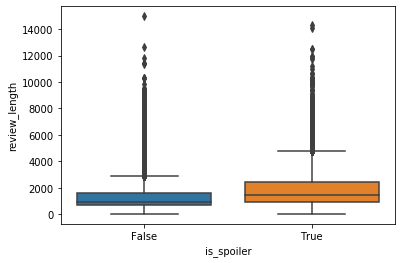

In [8]:
print('review_length vs. is spoiler')
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.boxplot(x='is_spoiler', y='review_length', data=data)

### subset 2010 - 2018

In [9]:
data = data[data.review_date >= 2010]
data = data.drop_duplicates()
data = data.dropna()
data.to_csv(fpath('movies1018.scv'), index=False)

### Reddite /r/movies 
- posts -- scrapped by year 2018 - 2019
- comments -- scapped by post id

In [10]:
p18 = pd.read_csv(fpath('rmovies2018.csv'), low_memory=False)
p19 = pd.read_csv(fpath('rmovies2019.csv'), low_memory=False)

In [11]:
p19.shape

(24002, 78)

In [12]:
p18 = p18.drop_duplicates()
p18 = p18.dropna(how='all')

p19 = p19.drop_duplicates()
p19 = p19.dropna(how='all')

In [13]:
print(p18.shape, p19.shape)

print( f'% of missing in selftext - 2018: {sum(p18.selftext.isna()) / len(p18) * 100:.2f}%')
print( f'% of missing in selftext - 2019: {sum(p19.selftext.isna()) / len(p18) * 100:.2f}%')

(46000, 93) (24002, 78)
% of missing in selftext - 2018: 70.92%
% of missing in selftext - 2019: 35.04%


In [14]:
c18 = pd.read_csv(fpath('rmovies_2018_comments.csv'), low_memory=False)
c19 = pd.read_csv(fpath('rmovies_2019_comments.csv'), low_memory=False)

c18 = c18.drop_duplicates()
c18 = c18.dropna(how='all')

c19 = c19.drop_duplicates()
c19 = c19.dropna(how='all')

In [15]:
posts = pd.concat([p18, p19], axis=0, sort=True)
comms = pd.concat([c18, c19], axis=0, sort=True)

posts = posts[posts.title.apply(lambda s: type(s) != float)]
comms = comms[comms.body.apply(lambda s: type(s) != float)]

- note -- might set is_selftext to one hot variable for later use, not applicable in this model due to different feture 
- join posts title & seleftext to one varialbe, get the review_length

In [16]:
def join_title_text(title, text):
    if type(text) == float:
        return title
    if title[-1] not in string.punctuation:
        title = title.strip() +  '.'
    else:
        pun = title[-1]
        title = title.strip() + pun
    return title + text

In [17]:
# posts['raw_title'] = posts['title']
# posts['title'] = posts.apply(lambda row: join_title_text(row.title, row.selftext) , axis=1)
posts['review_length'] = posts.title.apply(len)
comms['review_length'] = comms.body.apply(len)

- plot num_comments & scores => get popular thread only

Text(0.5, 1.0, 'Distribution of review length -- all datasets')

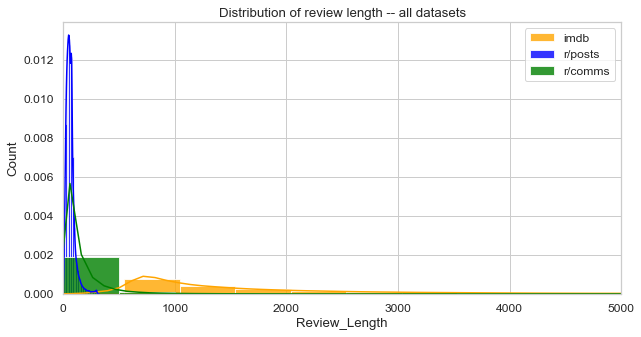

In [18]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(
    data['review_length'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 0.8}, color='orange',
    label = 'imdb',
).set(xlabel='Review_Length', ylabel='Count');

sns.distplot(
    posts['review_length'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 0.8}, color= 'blue', 
    label = 'r/posts',
).set(xlabel='Review_Length', ylabel='Count');

sns.distplot(
    comms['review_length'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 0.8}, color='green',
    label='r/comms',
).set(xlabel='Review_Length', ylabel='Count');

plt.legend()
plt.xlim(0, 5000)
plt.title('Distribution of review length -- all datasets')

In [19]:
posts.score = posts.score.fillna(0).astype(int)
comms.score = comms.score.fillna(0).astype(int)
posts.num_comments = posts.num_comments.astype(int)
# DONE:make sure link_id and post id can be connected
comms = comms[comms.score >=1]

In [20]:
from collections import Counter
# negative karma can be a indicator? filter out by setting the lower thershold
# Counter(comms.score)

Text(0.5, 1.0, 'Distribution of karma -- reddit')

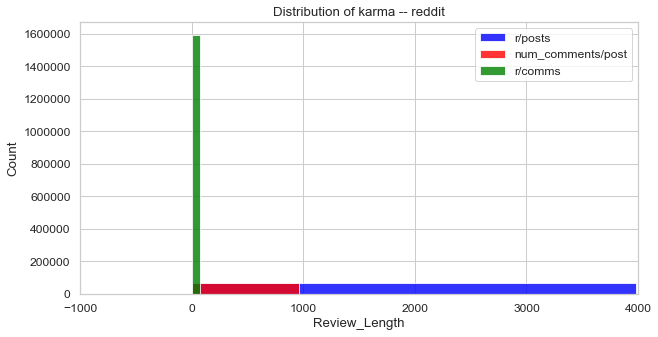

In [21]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.distplot(
    posts['score'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 0.8}, color= 'blue', 
    label = 'r/posts',
).set(xlabel='Review_Length', ylabel='Count');

sns.distplot(
    posts['num_comments'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 0.8}, color= 'red', 
    label = 'num_comments/post',
).set(xlabel='Review_Length', ylabel='Count');


sns.distplot(
    comms['score'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 0.8}, color='green',
    label='r/comms',
).set(xlabel='Review_Length', ylabel='Count');

plt.legend()
plt.xlim(-1000, 4000)
plt.title('Distribution of karma -- reddit')

In [22]:
posts.to_csv(fpath('r_postsEDA.csv'), index=False)
comms.to_csv(fpath('r_commsEDA.csv'), index=False)

## Next Step:
- Clean - Vader - generate model vector - modeling - tuning - validation  
